In [1]:
# Investigating how easy it is to take a random segment of trajectory (dead-reckoned) along with color measurements, 
# and determine global pose by fitting the trajectory to the map

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from cbl_particle_filter.carpet_map import load_map_from_png
from cbl_particle_filter.visualisation import plot_map
from cbl_particle_filter.filter import load_input_log, Pose, OdomMeasurement, add_poses
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [3]:
log_dir = Path("../logs/20210708_office_patrol_five_loops/").resolve()
log_file = f"{log_dir}/localiser_input_log.pickle"
map_png = f"{log_dir}/office_map.png"

In [4]:
carpet = load_map_from_png(map_png, cell_size=0.5)


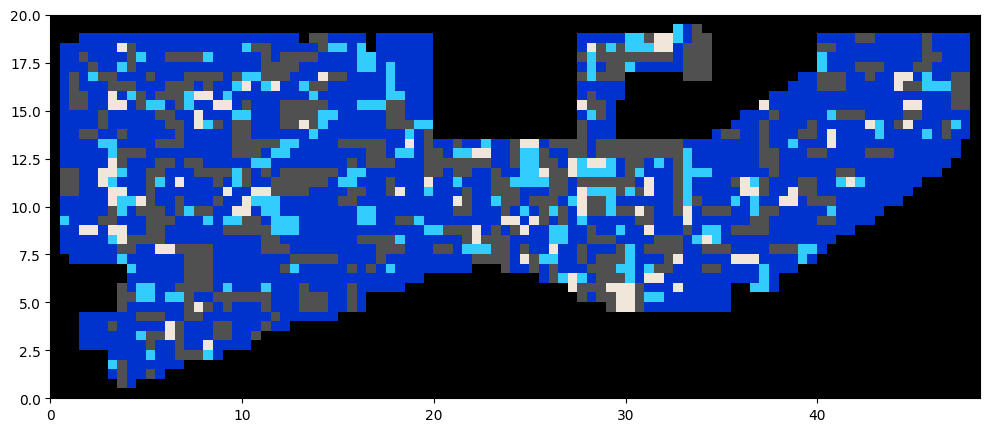

In [5]:
plot_map(carpet)

In [6]:
log = load_input_log(log_file)


In [7]:
start_pose = Pose(0,0,0)
current_pose = start_pose

def increment_pose(current_pose: Pose, pose_increment: OdomMeasurement) -> Pose:
    """
    Add given increment to given pose
    """
    x, y, heading = add_poses(
        np.array([[current_pose.x, current_pose.y, current_pose.heading]]),
        np.array([[pose_increment.dx, pose_increment.dy, pose_increment.dheading]])
    )[0]
    return Pose(x,y,heading)
    

trajectory_poses = []
for measurement in log:
    odom, color, pose = measurement
    if odom is None or color is None:
        continue
    current_pose = increment_pose(current_pose, odom)
    trajectory_poses.append(dict(
        x=current_pose.x,
        y=current_pose.y,
        heading=current_pose.heading,
        color=color,
        r=color.rgb[0],
        g=color.rgb[1],
        b=color.rgb[2],
    ))
    
full_trajectory = pd.DataFrame(trajectory_poses)
full_trajectory

,x,y,heading,color,r,g,b
0,0.000000,0.000000,0.000000,"Color(index=3, name='DARK_BLUE', rgb=(0, 51, 2...",0,51,204
1,0.000000,0.000000,0.000000,"Color(index=1, name='LIGHT_BLUE', rgb=(51, 204...",51,204,255
2,0.036137,-0.000149,-0.136766,"Color(index=1, name='LIGHT_BLUE', rgb=(51, 204...",51,204,255
3,0.130030,-0.037690,-0.275856,"Color(index=1, name='LIGHT_BLUE', rgb=(51, 204...",51,204,255
4,0.324710,-0.091047,-0.346016,"Color(index=1, name='LIGHT_BLUE', rgb=(51, 204...",51,204,255
...,...,...,...,...,...,...,...
3876,-7.358353,-4.200264,-24.893511,"Color(index=1, name='LIGHT_BLUE', rgb=(51, 204...",51,204,255
3877,-7.357158,-4.177178,-24.759693,"Color(index=1, name='LIGHT_BLUE', rgb=(51, 204...",51,204,255
3878,-7.360893,-4.167592,-24.629548,"Color(index=1, name='LIGHT_BLUE', rgb=(51, 204...",51,204,255
3879,-7.382415,-4.166957,-24.509257,"Color(index=1, name='LIGHT_BLUE', rgb=(51, 204...",51,204,255


In [8]:
full_trajectory[['r', 'g', 'b']].values

array([[  0,  51, 204],
       [ 51, 204, 255],
       [ 51, 204, 255],
       ...,
       [ 51, 204, 255],
       [ 51, 204, 255],
       [ 51, 204, 255]])

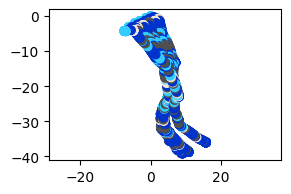

In [26]:
def plot_trajectory(trajectory):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot(trajectory.x, trajectory.y,color='k', zorder=1)
    ax.scatter(trajectory.x, trajectory.y, color=trajectory[['r', 'g', 'b']].values/255, zorder=2)
    plt.axis("equal")
    plt.show()
plot_trajectory(full_trajectory)

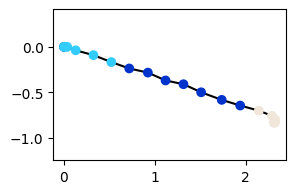

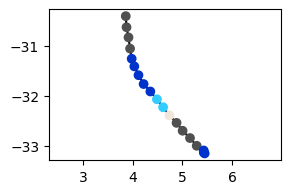

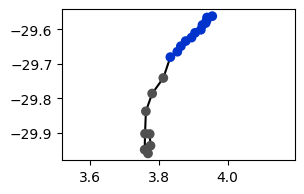

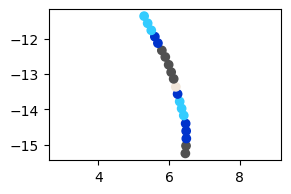

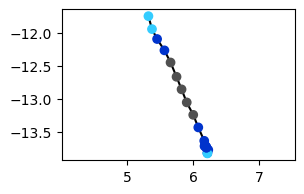

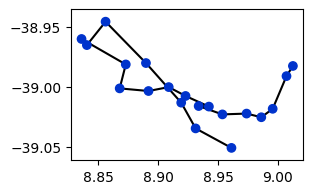

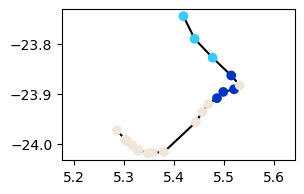

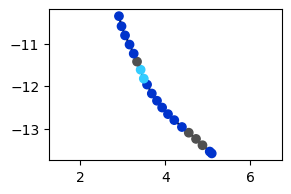

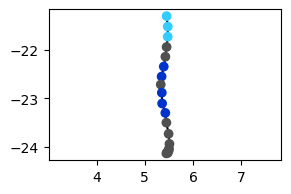

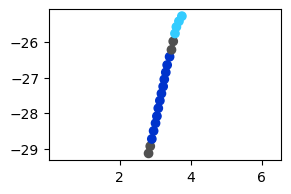

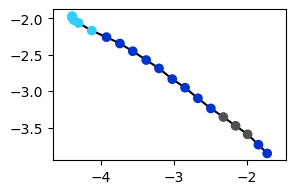

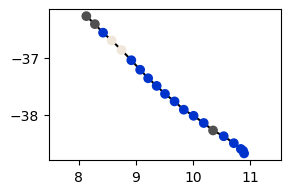

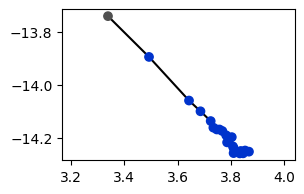

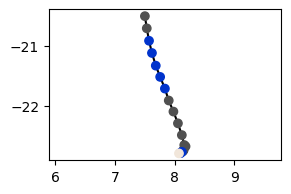

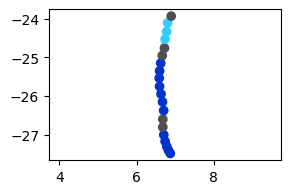

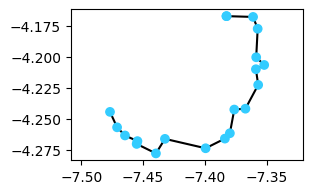

In [27]:
trajectory_sample_length = 20
plt.rcParams['figure.figsize'] = [3, 2]

for start_i_float in np.linspace(0, len(full_trajectory.index) - trajectory_sample_length, num=16):
    start_i = int(start_i_float)
    end_i = start_i + trajectory_sample_length
    trajectory_sample = full_trajectory.iloc[start_i:end_i,:]
    plot_trajectory(trajectory_sample)